In [130]:
# Step 1: Load and Preprocess the Data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [89]:
# Load the dataset
file_path = 'housing.csv'
data = pd.read_csv(file_path)

In [90]:
# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("Preview of Dataset:")
print(data.head())

Dataset Shape: (1460, 81)
Preview of Dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  Sa

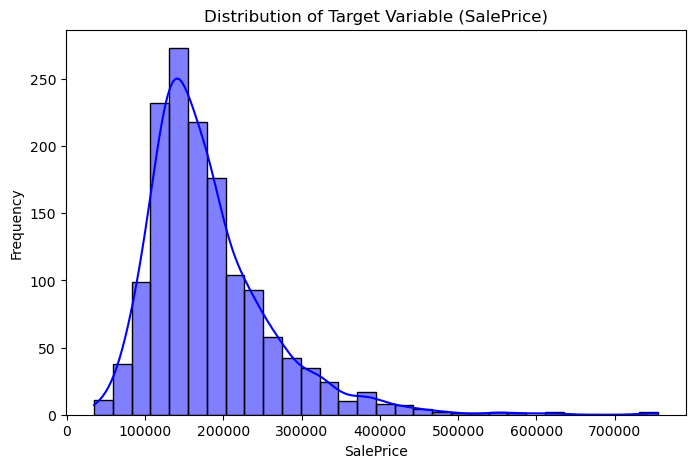

In [91]:
# Identify target variable and predictors
target = "SalePrice"
X = data.drop(columns=["Id", target])
y = data[target]

# Visualize target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title("Distribution of Target Variable (SalePrice)")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [92]:
# Separate numerical and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("\nNumerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))


Numerical Columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Categorical Columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',

In [94]:
# Preprocessing pipeline
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)

In [97]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display train-test split summary
print("\nTraining Set Shape: X =", X_train.shape, ", y =", y_train.shape)
print("Test Set Shape: X =", X_test.shape, ", y =", y_test.shape)


Training Set Shape: X = (1168, 79) , y = (1168,)
Test Set Shape: X = (292, 79) , y = (292,)


In [98]:
# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [102]:
# Convert sparse matrix to dense format for modeling
X_train_dense = X_train_preprocessed.toarray()
X_test_dense = X_test_preprocessed.toarray()

In [105]:
# Show basic stats after preprocessing
print("\nProcessed Training Data Shape:", X_train_dense.shape)
print("Processed Test Data Shape:", X_test_dense.shape)


Processed Training Data Shape: (1168, 285)
Processed Test Data Shape: (292, 285)


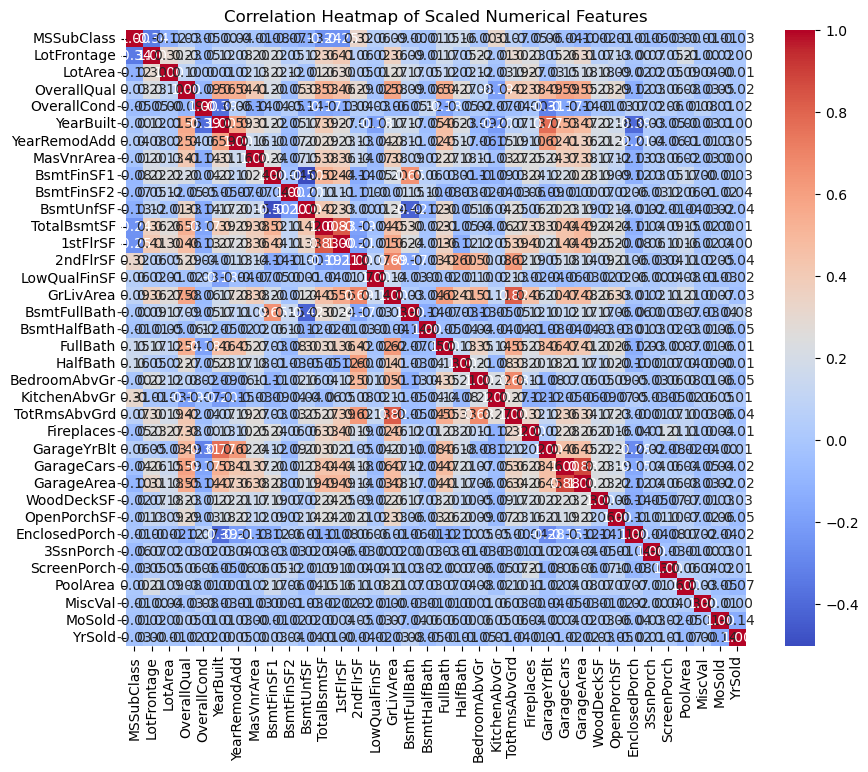

In [106]:
# Visualizing preprocessed numerical features
X_train_scaled = pd.DataFrame(X_train_dense[:, :len(num_cols)], columns=num_cols)

# Correlation heatmap of scaled numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Scaled Numerical Features")
plt.show()

In [107]:
# Visualize example rows of the preprocessed data
X_train_preprocessed_sample = pd.DataFrame(X_train_dense, columns=preprocessor.get_feature_names_out())
print("\nExample Preprocessed Data (First 5 Rows):")
print(X_train_preprocessed_sample.head())


Example Preprocessed Data (First 5 Rows):
   num__MSSubClass  num__LotFrontage  num__LotArea  num__OverallQual  \
0        -0.866764         -0.012468     -0.212896         -0.820445   
1         0.074110         -0.502357     -0.265245         -0.088934   
2        -0.631546         -0.146074     -0.177841         -0.820445   
3        -0.161109         -0.457822     -0.324474         -0.820445   
4        -0.161109         -0.903175     -0.529035         -0.820445   

   num__OverallCond  num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  \
0          0.372217       -0.455469          -1.346063        -0.597889   
1          1.268609        0.718609           0.439214        -0.597889   
2          1.268609       -1.988293          -1.683818        -0.597889   
3          1.268609       -1.107734          -1.683818         0.861522   
4          0.372217       -1.531707          -1.683818        -0.597889   

   num__BsmtFinSF1  num__BsmtFinSF2  ...  cat__SaleType_ConLw  \
0       

In [110]:
# Visualize the first few categorical encoded features
cat_encoded_columns = [col for col in preprocessor.get_feature_names_out() if "cat__" in col]
print("\nExample of Encoded Categorical Columns:")
print(cat_encoded_columns[:5])


Example of Encoded Categorical Columns:
['cat__MSZoning_C (all)', 'cat__MSZoning_FV', 'cat__MSZoning_RH', 'cat__MSZoning_RL', 'cat__MSZoning_RM']


In [ ]:
#Step 2: Perform Stepwise Feature Selection

def stepwise_selection(X, y, significance_level=0.05):
    """ Perform stepwise regression to find significant predictors. """
    initial_features = list(range(X.shape[1]))
    selected_features = []
    
    while initial_features:
        remaining_features = list(set(initial_features) - set(selected_features))
        p_values = []
        for feature in remaining_features:
            X_selected = sm.add_constant(X[:, selected_features + [feature]])
            model = sm.OLS(y, X_selected).fit()
            p_values.append((feature, model.pvalues[-1]))
        
        # Select feature with lowest p-value below threshold
        p_values = sorted(p_values, key=lambda x: x[1])
        if p_values and p_values[0][1] < significance_level:
            selected_features.append(p_values[0][0])
        else:
            break  # Stop if no feature is significant anymore
    
    return selected_features
    
# Perform stepwise selection
selected_columns = stepwise_selection(X_train_dense, y_train)

In [120]:
# Build the final model with the selected predictors
X_train_reduced = sm.add_constant(X_train_dense[:, selected_columns])
glm_model_final = sm.OLS(y_train, X_train_reduced).fit()

# Display the summary of the final parsimonious model
print(glm_model_final.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     236.6
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:55:31   Log-Likelihood:                -13288.
No. Observations:                1168   AIC:                         2.669e+04
Df Residuals:                    1109   BIC:                         2.699e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1070.6006   2.45e+04      0.044      0.9

In [128]:
#Step 3: Check and Address Multicollinearity

# Calculate VIF for the selected predictors
vif_data = pd.DataFrame({
    "Feature": selected_columns,
    "VIF": [variance_inflation_factor(X_train_reduced[:, 1:], i) for i in range(len(selected_columns))]
})

# Drop features with VIF > 10 (commonly used threshold)
low_vif_features = vif_data[vif_data["VIF"] < 10]["Feature"].tolist()
X_train_final_vif = sm.add_constant(X_train_dense[:, low_vif_features])

# Fit the final GLM after VIF adjustment
glm_model_vif_final = sm.OLS(y_train, X_train_final_vif).fit()
print(glm_model_vif_final.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     236.5
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:59:01   Log-Likelihood:                -13329.
No. Observations:                1168   AIC:                         2.677e+04
Df Residuals:                    1113   BIC:                         2.705e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.599e+05   2638.514     60.597      0.0

In [132]:
# Step 4: Evaluate the Simplified Model

# Preprocess test data and reduce to selected features
X_test_final = sm.add_constant(X_test_dense[:, low_vif_features])

# Predict on the test set
y_test_pred = glm_model_vif_final.predict(X_test_final)

# Evaluate the performance
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {rmse}")
print(f"Test R-squared: {r2}")

Test RMSE: 28247.985212250365
Test R-squared: 0.8959693959555678


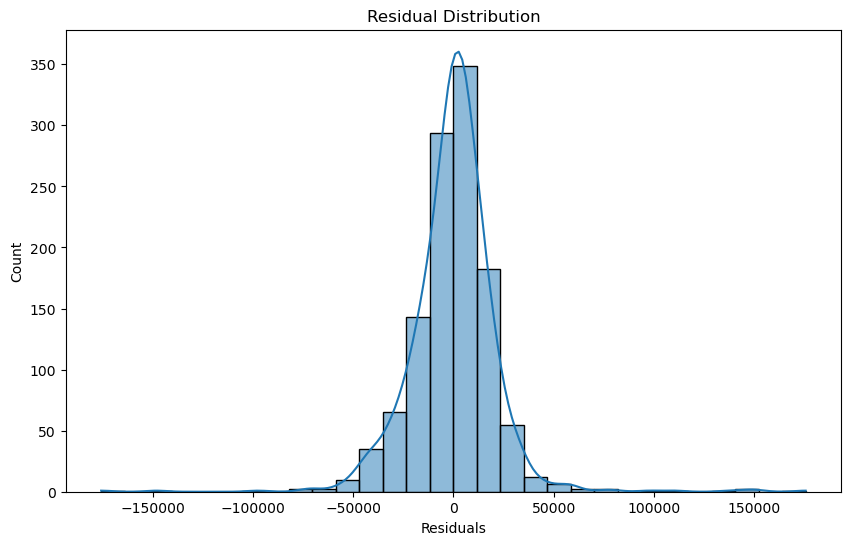

In [134]:
# Residual Distribution

# Residual plot
residuals = y_train - glm_model_vif_final.predict(X_train_final_vif)

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

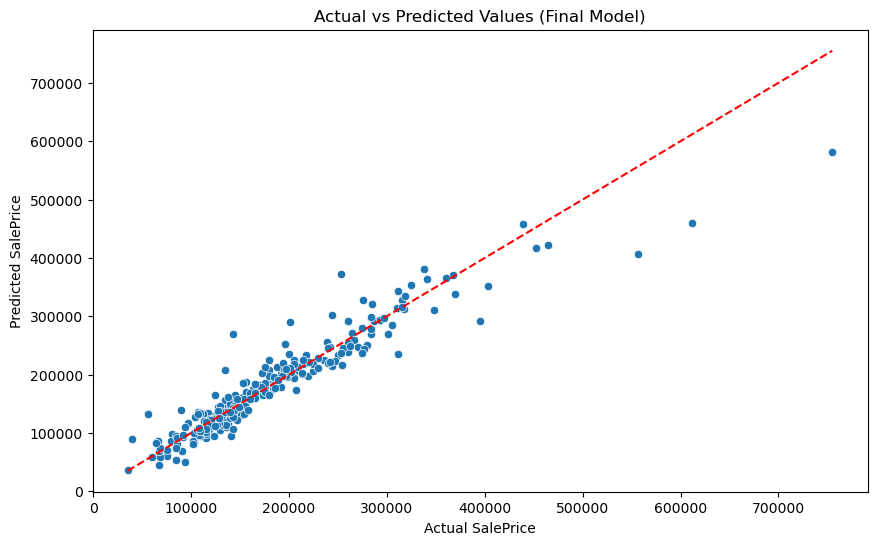

In [136]:
# Plot actual vs predicted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Values (Final Model)")
plt.show()